In [6]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

file_path = r'C:\\Users\\Lenovo\\Downloads\\binusmaya_form_result.xlsx'
xls = pd.ExcelFile(file_path)
df = xls.parse('Form Responses 1')

In [7]:
sus_columns = [
    'I think I would like to use this app frequently.',
    'I found the system unnecessarily complex.',
    'I thought the system was easy to use.',
    'I think that I would need the support of a technical person to be able to use this system.',
    'I found the various functions in this system were well integrated.',
    'I thought there was too much inconsistency in this system.',
    'I would imagine that most people would learn to use this system very quickly.',
    'I found the system very cumbersome to use.',
    'I felt very confident using the system.',
    'I needed to learn a lot of things before I could get going with this system.'
]

sus_data = df[sus_columns]

In [8]:
def calculate_sus_score(row):
    score = 0
    for i, value in enumerate(row):
        if i % 2 == 0:
            score += (value - 1)
        else:
            score += (5 - value)
    return score * 2.5

df['SUS Score'] = sus_data.apply(calculate_sus_score, axis=1)
average_sus_score = df['SUS Score'].mean()

In [9]:
print(df[['SUS Score']])
print(f"\nAverage SUS Score: {average_sus_score:.2f}")

     SUS Score
0         60.0
1         52.5
2         67.5
3         45.0
4         67.5
..         ...
127       85.0
128       80.0
129       82.5
130       80.0
131       82.5

[132 rows x 1 columns]

Average SUS Score: 77.23


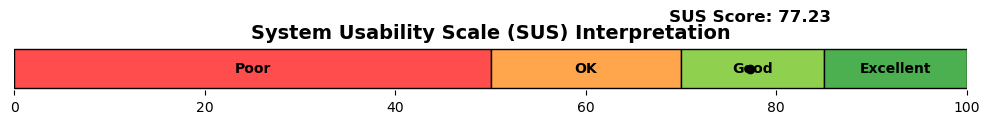

In [10]:
categories = ['Poor', 'OK', 'Good', 'Excellent']
ranges = [0, 50, 70, 85, 100]
colors = ['#ff4d4d', '#ffa64d', '#8fd14f', '#4caf50']

fig, ax = plt.subplots(figsize=(10, 2))
for i in range(len(categories)):
    ax.barh(y=0, width=ranges[i+1] - ranges[i], left=ranges[i],
            height=0.5, color=colors[i], edgecolor='black')
    ax.text((ranges[i] + ranges[i+1]) / 2, 0, categories[i],
            ha='center', va='center', fontsize=10, fontweight='bold')

ax.plot(average_sus_score, 0, 'o', color='black')
ax.text(average_sus_score, 0.6, f'SUS Score: {average_sus_score:.2f}',
        ha='center', fontsize=12, fontweight='bold')

ax.set_yticks([])
ax.set_xlim(0, 100)
ax.set_title('System Usability Scale (SUS) Interpretation', fontsize=14, fontweight='bold')
plt.box(False)
plt.tight_layout()
plt.show()